In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow import convert_to_tensor
from sklearn.metrics import r2_score

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [3]:
from nltk.corpus import stopwords

In [4]:
train_data = pd.read_csv('fake_news_train.csv')

In [5]:
stop_words = stopwords.words('english')

In [6]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
def preprocessing(data, words):
    data.fillna(' ', inplace=True)
    data['content'] = data['author'] + ' ' + data['title']
    data['content'] = data['content'].str.lower().str.replace('[^a-zA-Z0-9\s]', '')
    data['clean_content'] = data['content'].apply(lambda x:" ".join([word for word in x.split() if word not in words]))

    return data

In [10]:
cleaned_train_data = preprocessing(train_data, stop_words)

C:\Users\rlope\AppData\Local\Temp\ipykernel_10652\284818709.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.lower().str.replace('[^a-zA-Z0-9\s]', '')


In [11]:
cleaned_train_data

,id,title,author,text,label,content,clean_content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus house dem aide we didnt even see...,darrell lucus house dem aide didnt even see co...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillary clinton big woman...,daniel j flynn flynn hillary clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnewscom why the truth might get you ...,consortiumnewscom truth might get fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilians killed in single ...,jessica purkiss 15 civilians killed single us ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jailed for fictio...,howard portnoy iranian woman jailed fictional ...
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,jerome hudson rapper ti trump a poster child f...,jerome hudson rapper ti trump poster child whi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,benjamin hoffman nfl playoffs schedule matchup...,benjamin hoffman nfl playoffs schedule matchup...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,michael j de la merced and rachel abrams macys...,michael j de la merced rachel abrams macys sai...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,alex ansary nato russia to hold parallel exerc...,alex ansary nato russia hold parallel exercise...


In [12]:
cleaned_train_data.isnull().sum()

id               0
title            0
author           0
text             0
label            0
content          0
clean_content    0
dtype: int64

In [13]:
def token(data, column, text_lenght):
    text_to_list = data[column].to_list()
    
    tokenizer = Tokenizer(oov_token='<OOV>')
    tokenizer.fit_on_texts(text_to_list)

    words_index = tokenizer.word_index
    vocabulary_size = len(words_index) + 1

    sequences = tokenizer.texts_to_sequences(data[column])

    padded_sequences = pad_sequences(sequences, maxlen=text_lenght, padding='post', truncating='post')

    return words_index, vocabulary_size, padded_sequences

In [14]:
words_index, vocabulary_size, padded_sequences = token(cleaned_train_data, 'clean_content', 700)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, cleaned_train_data['label'], test_size=0.33, random_state=42, stratify=cleaned_train_data['label'])

In [16]:
X_val.shape

(6864, 700)

In [17]:
X_val.shape

(6864, 700)

In [18]:
def vectorizer(file, encoder):
    embedding_dict = {}
    embedding_matrix = np.zeros((vocabulary_size, 100))
    with open(file, encoding=encoder) as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_dict[word] = coefs

    for word, item in words_index.items():
        vector = embedding_dict.get(word)
        if vector is not None:
            embedding_matrix[item] = vector

    return embedding_matrix

In [19]:
embedding_matrix = vectorizer('fake_news_words.txt', 'utf-8')

In [20]:
embedding_matrix.shape

(26130, 100)

In [21]:
vocabulary_size

26130

In [22]:
lstm = Sequential(
    [
        Embedding(vocabulary_size, 100, weights=[embedding_matrix], trainable=False),
        layers.Dropout(0.23),
        LSTM(32, return_sequences=True),
        layers.GlobalAveragePooling1D(),
        Dense(128),
        Dense(1, activation='sigmoid')
    ]
)

lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2613000   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, None, 32)          17024     
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                       

In [23]:
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super(R2Score, self).__init__(name=name, **kwargs)
        self.y_true_values = []
        self.y_pred_values = []

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        self.y_true_values.append(y_true)
        self.y_pred_values.append(y_pred)

    def result(self):
        y_true = tf.concat(self.y_true_values, axis=0)
        y_pred = tf.concat(self.y_pred_values, axis=0)
        r2 = r2_score(y_true.numpy(), y_pred.numpy())
        return tf.convert_to_tensor(r2, dtype=tf.float32)

In [24]:
tf.config.run_functions_eagerly(True)

In [25]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', R2Score()])

In [26]:
tensor_X_train = convert_to_tensor(X_train)
tensor_X_val = convert_to_tensor(X_val)
tensor_y_train = convert_to_tensor(y_train)
tensor_y_val = convert_to_tensor(y_val)

In [27]:
tensor_X_val.shape

TensorShape([6864, 700])

In [28]:
model1 = lstm.fit(tensor_X_train, tensor_y_train, epochs=8, batch_size=100, validation_data=(tensor_X_val, tensor_y_val))

c:\Users\rlope\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/8

140/140 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.7476 - r2_score: 0.2564

c:\Users\rlope\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


140/140 [==============================] - 437s 3s/step - loss: 0.5636 - accuracy: 0.7476 - r2_score: 0.2564 - val_loss: 0.4362 - val_accuracy: 0.8805 - val_r2_score: 0.3300
Epoch 2/8
140/140 [==============================] - 452s 3s/step - loss: 0.2622 - accuracy: 0.9053 - r2_score: 0.4758 - val_loss: 0.1935 - val_accuracy: 0.9180 - val_r2_score: 0.5236
Epoch 3/8
140/140 [==============================] - 478s 3s/step - loss: 0.1819 - accuracy: 0.9254 - r2_score: 0.5887 - val_loss: 0.1642 - val_accuracy: 0.9291 - val_r2_score: 0.6122
Epoch 4/8
140/140 [==============================] - 488s 3s/step - loss: 0.1661 - accuracy: 0.9368 - r2_score: 0.6483 - val_loss: 0.1526 - val_accuracy: 0.9363 - val_r2_score: 0.6621
Epoch 5/8
140/140 [==============================] - 510s 4s/step - loss: 0.1316 - accuracy: 0.9470 - r2_score: 0.6883 - val_loss: 0.1395 - val_accuracy: 0.9442 - val_r2_score: 0.6982
Epoch 6/8
140/140 [==============================] - 542s 4s/step - loss: 0.1169 - accurac

([<matplotlib.axis.XTick at 0x194c4b63af0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

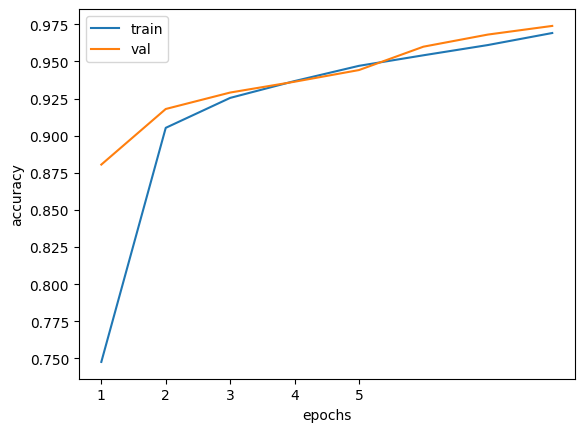

In [29]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])

axis = plt.gca()
axis.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axis.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

([<matplotlib.axis.XTick at 0x194c2cfd3d0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

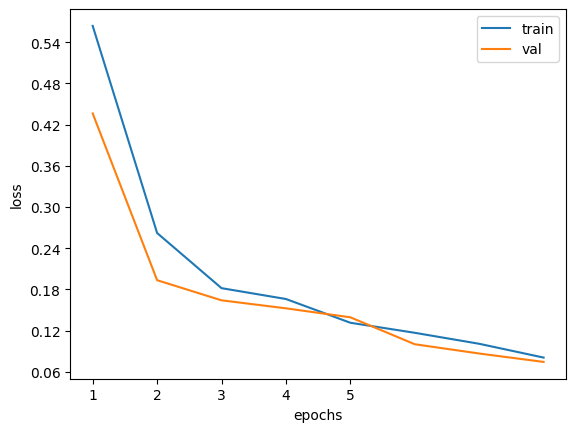

In [30]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])

axis = plt.gca()
axis.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axis.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

In [31]:
model1.history

{'loss': [0.5636240243911743,
  0.2621743083000183,
  0.18190203607082367,
  0.16611625254154205,
  0.13155154883861542,
  0.11692594736814499,
  0.10094249248504639,
  0.08085845410823822],
 'accuracy': [0.7476320266723633,
  0.9052813053131104,
  0.9254449009895325,
  0.9367824196815491,
  0.9470436573028564,
  0.9541475176811218,
  0.9610361456871033,
  0.9691446423530579],
 'r2_score': [0.25641074776649475,
  0.4757702052593231,
  0.5887089371681213,
  0.6482760906219482,
  0.6882525682449341,
  0.7179216146469116,
  0.7429786324501038,
  0.7644355297088623],
 'val_loss': [0.43620914220809937,
  0.19348552823066711,
  0.16420452296733856,
  0.15255241096019745,
  0.1394820511341095,
  0.10028040409088135,
  0.08676972985267639,
  0.07453858852386475],
 'val_accuracy': [0.8805361390113831,
  0.9179778695106506,
  0.929050087928772,
  0.936334490776062,
  0.944201648235321,
  0.9599359035491943,
  0.9680944085121155,
  0.9739218950271606],
 'val_r2_score': [0.329977810382843,
  0.523

In [32]:
test_data = pd.read_csv('fake_news_test.csv')

In [33]:
cleaned_test_data = preprocessing(test_data, stop_words)

C:\Users\rlope\AppData\Local\Temp\ipykernel_10652\284818709.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.lower().str.replace('[^a-zA-Z0-9\s]', '')


In [34]:
words_index, vocabulary_size, padded_sequences = token(cleaned_test_data, 'clean_content', 700)

In [35]:
test_predition = lstm.predict(padded_sequences, batch_size=64, verbose=1)

c:\Users\rlope\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


82/82 [==============================] - 103s 1s/step


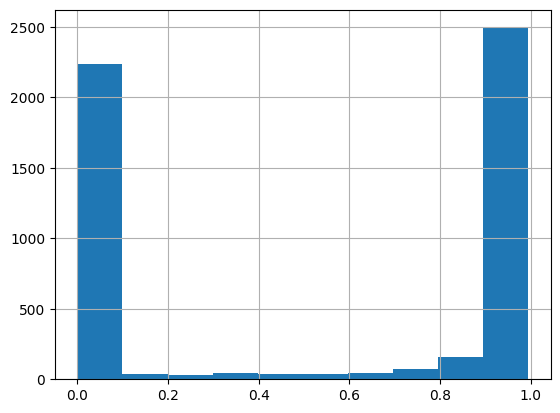

In [36]:
submission_df = pd.DataFrame({'id': test_data['id'].to_list(), 'label': test_predition.reshape((5200,))})

submission_df['label'].hist()
plt.show()

In [37]:
threshold = 0.5
submission_df['label'] = np.where(submission_df['label'] >= threshold, 1, 0)
submission_df['label'].value_counts()

1    2807
0    2393
Name: label, dtype: int64

In [38]:
submission_df.to_csv('submissao.csv', index=False)